In [1]:
!pip install rasterio
import rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 28.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# import gdal
import numpy as np
import matplotlib.pyplot as plt

In [4]:
gain = 0.00002
offset = -0.1

In [5]:
with rasterio.open('/content/gdrive/MyDrive/thesis/data/dn.tif', driver='GTiff') as src:
      dn = src.read()[:, 3:-2, 3:-2]

with rasterio.open('/content/gdrive/MyDrive/thesis/data/toa.tif', driver='GTiff') as src:
      toa = src.read()[:, 3:-2, 3:-2]

dn = dn.transpose(1, 2, 0)
toa = toa.transpose(1, 2, 0)

print(dn.shape, dn.dtype)
print(toa.shape, toa.dtype)

(30, 30, 7) uint16
(30, 30, 7) float32


In [6]:
toa_f = (20*toa[:, :, 0] + 65*toa[:, :, 1] + 75*toa[:, :, 2] + 50*toa[:, :, 3] + 40*toa[:, :, 4] + 100*toa[:, :, 5] + 200*toa[:, :, 6])/(20+65+75+50+40+100+200)

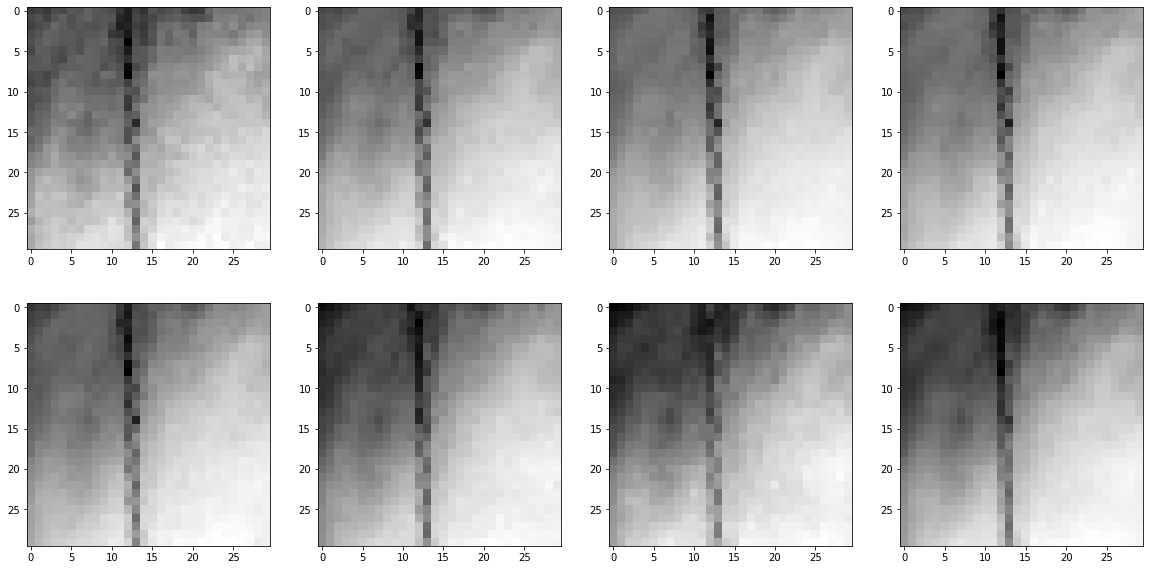

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for ind, ax in enumerate(axs.ravel()):
  if ind==7:
    ax.imshow(toa_f, cmap='gray')
    break
  ax.imshow(toa[:, :, ind], cmap='gray')

In [ ]:
# std = np.std(toa_f[15:, 15:])
# mean = np.mean(toa_f[15:, 15:])
# mask = np.logical_and((mean-0.1*std)<toa_f, toa_f<(mean+0.1*std))
# print(std, mean, mask.sum())
# plt.imshow(mask, cmap='gray')

0.0029181014 0.37591538 44


In [8]:
dn = dn[-15:, -15:]
toa = toa[-15:, -15:]
toa_f = toa_f[-15:, -15:]
print(dn.shape)

(15, 15, 7)


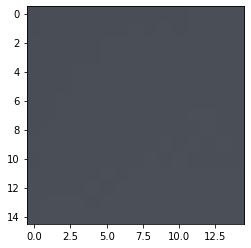

In [12]:
plt.imshow(toa[:, :, 0:3])

In [13]:
print(dn[-5:, -5:, 0])
print(toa[-5:, -5:, 0])
# print(toa_f[-5:, -5:])

[[12463 12458 12436 12453 12456]
 [12471 12464 12461 12468 12465]
 [12473 12453 12457 12488 12476]
 [12470 12465 12458 12484 12487]
 [12465 12474 12500 12466 12468]]
[[0.29419824 0.29400113 0.29313388 0.29380405 0.2939223 ]
 [0.2945136  0.29423767 0.29411942 0.29439536 0.2942771 ]
 [0.29459247 0.29380405 0.29396173 0.29518378 0.29471073]
 [0.29447418 0.2942771  0.29400113 0.2950261  0.29514435]
 [0.2942771  0.29463187 0.29565683 0.2943165  0.29439536]]


In [14]:
cst = np.mean(toa/(dn*gain+offset))

In [ ]:
(12463 *gain+offset)*cst

0.29419825012127154

In [16]:
toa_spec = np.load('/content/gdrive/MyDrive/thesis/data/toa_spec.npy')
t1 = toa_spec[:, 0]
t3 = toa_spec[:, 1]

In [17]:
t2 = []
for i in range(len(t1)):
  t2.append(np.interp(21.43, [0, 30], [t1[i], t3[i]]))
t2 = np.array(t2)

bands = np.arange(400, 2510, 10)
toa_rcn = np.interp(np.arange(400, 2501), bands, t2)

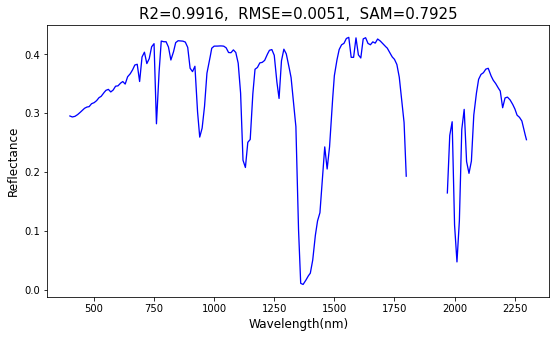

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 5))
ax.plot(np.arange(400, 1800), toa_rcn[:1400], 'b-', linewidth=1.3)
ax.plot(np.arange(1970, 2300), toa_rcn[1570:1900], 'b-', linewidth=1.3)
ax.set_title('R2=0.9916,  RMSE=0.0051,  SAM=0.7925', fontsize=15)
ax.set_xlabel('Wavelength(nm)', fontsize=12)
ax.set_ylabel('Reflectance', fontsize=12)
plt.savefig('/content/gdrive/MyDrive/thesis/plots/rcn.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
toa_b1_m = np.mean(toa[:, :, 0])
toa_b1_r = np.mean(toa_rcn[33:53])
scale_b1 = toa_b1_r/toa_b1_m
print(toa_b1_m, toa_b1_r, scale_b1)

toa_b2_m = np.mean(toa[:, :, 1])
toa_b2_r = np.mean(toa_rcn[50:115])
scale_b2 = toa_b2_r/toa_b2_m
print(toa_b2_m, toa_b2_r, scale_b2)

toa_b3_m = np.mean(toa[:, :, 2])
toa_b3_r = np.mean(toa_rcn[125:200])
scale_b3 = toa_b3_r/toa_b3_m
print(toa_b3_m, toa_b3_r, scale_b3)

toa_b4_m = np.mean(toa[:, :, 3])
toa_b4_r = np.mean(toa_rcn[230:280])
scale_b4 = toa_b4_r/toa_b4_m
print(toa_b4_m, toa_b4_r, scale_b4)

toa_b5_m = np.mean(toa[:, :, 4])
toa_b5_r = np.mean(toa_rcn[445:485])
scale_b5 = toa_b5_r/toa_b5_m
print(toa_b5_m, toa_b5_r, scale_b5)

toa_b6_m = np.mean(toa[:, :, 5])
toa_b6_r = np.mean(toa_rcn[1160:1260])
# scale_b6 = toa_b6_r/toa_b6_m
scale_b6 = 0.9409299629404653
print(toa_b6_m, toa_b6_r, scale_b6)

toa_b7_m = np.mean(toa[:, :, 6])
toa_b7_r = np.mean(toa_rcn[1700:1900])
# scale_b7 = toa_b7_r/toa_b7_m
scale_b7 = 0.9728156208179177
print(toa_b7_m, toa_b7_r, scale_b7)

0.29205588 0.30146294166666665 1.0322098180757253
0.30937284 0.3133233161538462 1.0127692974356322
0.34289813 0.3381553471111111 0.9861685355356324
0.3872302 0.3696477726666666 0.9545944103833235
0.4404423 0.4220942849999999 0.9583418551369403
0.44088453 0.41263704233333337 0.9409299629404653
0.37009054 0.330422619 0.9728156208179177


In [ ]:
gains = gain*np.array([scale_b1, scale_b2, scale_b3, scale_b4, scale_b5, scale_b6, scale_b7])
print(gains)

offsets = offset*np.array([scale_b1, scale_b2, scale_b3, scale_b4, scale_b5, scale_b6, scale_b7])
print(offsets)

[2.06441964e-05 2.02553859e-05 1.97233707e-05 1.90918882e-05
 1.91668371e-05 1.88185993e-05 1.94563124e-05]
[-0.10322098 -0.10127693 -0.09861685 -0.09545944 -0.09583419 -0.094093
 -0.09728156]


In [ ]:
(12463 *gains[0]+offsets[0])*cst

0.3036743222358745